**Imports**

In [4]:
%load_ext autoreload
%autoreload 2
from data_preprocessing import preprocess_data
from data_augmentation import balance_with_augmentation
from feature_extraction import get_feature_extractor
from model_training import train_model
from model_evaluation import evaluate_model
from config import MODELS
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Class mapping:
  0 = Glioma
  1 = Meningioma
  2 = None
  3 = Pituitary
Original class distribution:
  Class 0: 926 images
  Class 1: 937 images
  Class 2: 500 images
  Class 3: 901 images
Augmenting class 0 with 11 synthetic samples...
Augmenting class 2 with 437 synthetic samples...
Augmenting class 3 with 36 synthetic samples...
Final balanced dataset shape:
  Images: (3748, 224, 224, 3)
  Labels: (3748,)
Train label distribution: [656 656 655 656]
Test label distribution:  [281 281 282 281]

Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 37s 843ms/step - accuracy: 0.4366 - loss: 35.0310 - val_accuracy: 0.7927 - val_loss: 3.0966 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 33s 802ms/step - accuracy: 0.8448 - loss: 1.4283 - val_accuracy: 0.8666 - val_loss: 0.9410 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 867ms/step - accuracy: 0.8700 - loss: 0.8444 - val_accuracy: 0.9580 - val_loss: 0.1423 - learning_rate: 0.0010
Epo

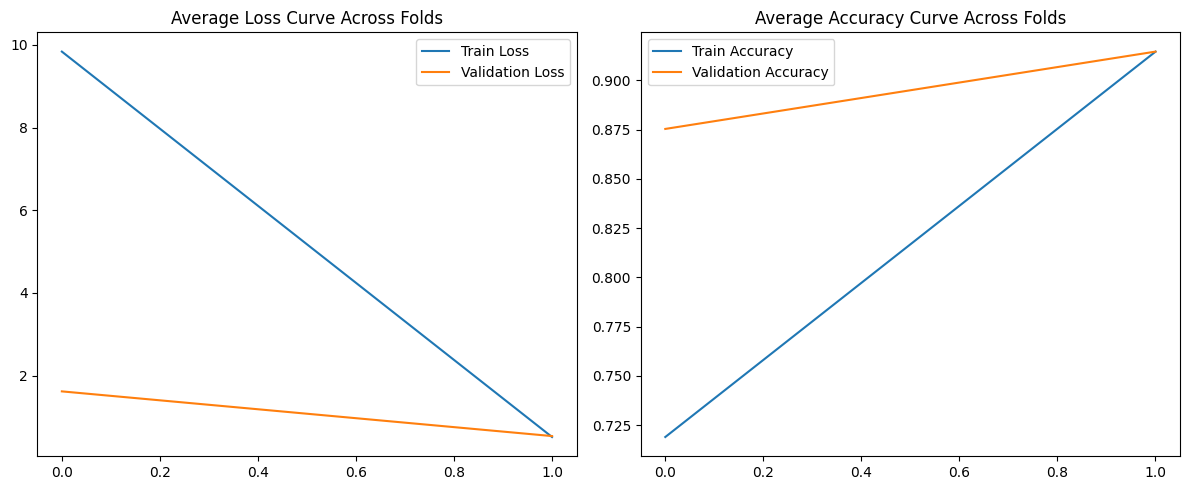

In [5]:
trained_models = {}

for i, model_name in enumerate(MODELS):    
    # Show class mapping only for the first model
    show_mapping = (i == 0)
    X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, show_class_mapping=show_mapping)

    model = get_feature_extractor(model_name)
    model = train_model(model, model_name, X_train, y_train)

    # Save model and test data for evaluation later
    trained_models[model_name] = {
        "model": model,
        "X_test": X_test,
        "y_test": y_test,
        "class_names": class_names
    }

**Model Training + Evaluation**

Training ResNet50...
Class mapping:
  0 = Glioma
  1 = Meningioma
  2 = None
  3 = Pituitary
Original class distribution:
  Class 0: 926 images
  Class 1: 937 images
  Class 2: 500 images
  Class 3: 901 images
Augmenting class 0 with 11 synthetic samples...
Augmenting class 2 with 437 synthetic samples...
Augmenting class 3 with 36 synthetic samples...
Final balanced dataset shape:
  Images: (3748, 224, 224, 3)
  Labels: (3748,)
Train label distribution: [656 656 655 656]
Test label distribution:  [281 281 282 281]

Training Fold 1...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 38s 852ms/step - accuracy: 0.5309 - loss: 28.1404 - val_accuracy: 0.7980 - val_loss: 0.8555 - learning_rate: 0.0010
Epoch 2/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 33s 803ms/step - accuracy: 0.8496 - loss: 0.6063 - val_accuracy: 0.8514 - val_loss: 0.6745 - learning_rate: 0.0010

Training Fold 2...
Epoch 1/2
41/41 ━━━━━━━━━━━━━━━━━━━━ 35s 854ms/step - accuracy: 0.8289 - loss: 0.6829 - val_accuracy: 0.9512 - val_loss: 0.1750 - lear

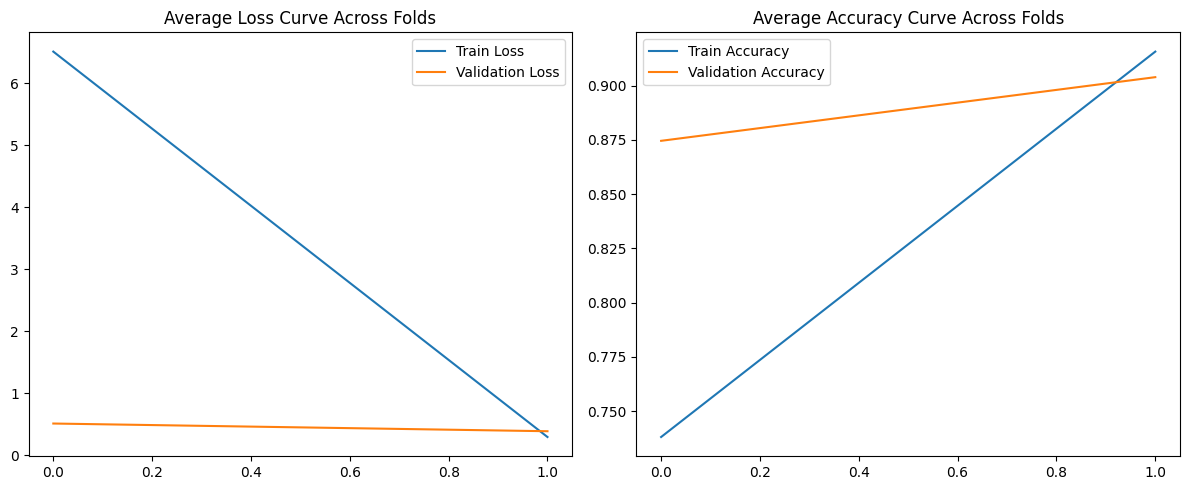

 9/36 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step

KeyboardInterrupt: 

In [ ]:
for model_name, data in trained_models.items():
    print(f"\n📊 Evaluating model: {model_name}")
    evaluate_model(data["model"], data["X_test"], data["y_test"], data["class_names"])